### features:
* spectogram coef
* zero crossing rate
* selected chromogram values
* selected tempogram values
* wavelet levels

In [1]:
import pandas as pd 
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import auc
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, precision_recall_curve, recall_score
import matplotlib.pyplot as plt
import itertools

RuntimeError: module compiled against API version 0xe but this version of numpy is 0xd

In [2]:
path = "/Users/ecem/Desktop/phonocardiogram/data/PV"

## Load data

Here, our target is to predict disease of patients with multiple diseases. So; our y will be disease column of two column indicatin geach patients disease.

In [3]:
present_df = pd.read_csv(path + "/present/present_PV_p_features.csv", index_col = 0) #1198, 18798
present_df

,freq_0,freq_1,freq_2,freq_3,freq_4,freq_5,freq_6,freq_7,freq_8,freq_9,...,tempogram_171,tempogram_174,tempogram_177,tempogram_181,tempogram_182,tempogram_183,tempogram_184,tempogram_188,tempogram_189,tempogram_191
0,4.405512e-11,6.290197e-11,6.424042e-11,6.586157e-11,6.767803e-11,6.992645e-11,7.249407e-11,7.482476e-11,7.671008e-11,7.846158e-11,...,1.954347e-17,-8.885503e-18,-7.090296e-18,5.621919e-17,1.316002e-18,1.530097e-17,3.332656e-17,8.179604e-18,3.045801e-17,4.588729e-17
1,1.185566e-10,1.695852e-10,1.729604e-10,1.756318e-10,1.769610e-10,1.768916e-10,1.756781e-10,1.737211e-10,1.713112e-10,1.684716e-10,...,1.262598e-17,-3.312395e-18,1.443682e-18,4.946563e-17,8.252103e-18,1.606138e-17,2.964353e-17,1.091674e-17,2.500401e-17,3.568724e-17
2,8.620206e-11,1.240978e-10,1.284911e-10,1.344301e-10,1.414676e-10,1.491734e-10,1.572446e-10,1.655685e-10,1.738919e-10,1.817201e-10,...,9.412302e-18,-5.078217e-18,-9.557851e-18,3.547765e-17,-1.045127e-17,9.001258e-18,1.438599e-17,1.010129e-17,1.360085e-17,3.314281e-17
3,8.315432e-11,1.179681e-10,1.191689e-10,1.214969e-10,1.244097e-10,1.273481e-10,1.299221e-10,1.318415e-10,1.329458e-10,1.332310e-10,...,-9.327725e-18,-2.003770e-17,-1.710636e-17,1.911969e-17,-7.871055e-18,3.369882e-18,9.688193e-18,8.503243e-19,7.080455e-18,1.486388e-17
4,8.048810e-11,1.143276e-10,1.151059e-10,1.156891e-10,1.158244e-10,1.153247e-10,1.140519e-10,1.119228e-10,1.089441e-10,1.052968e-10,...,2.298549e-18,-1.894136e-17,-2.195113e-17,3.439368e-17,-9.096462e-18,4.121490e-18,1.225106e-17,-2.161860e-18,3.231962e-18,1.551142e-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1193,1.014388e-10,1.448570e-10,1.482297e-10,1.525776e-10,1.572981e-10,1.619493e-10,1.661892e-10,1.697928e-10,1.727498e-10,1.754887e-10,...,1.925648e-18,-1.173323e-17,-5.497666e-18,2.757510e-17,3.420739e-18,5.616719e-18,2.954154e-18,8.512995e-18,9.048285e-18,1.819401e-17
1194,1.260508e-10,1.810589e-10,1.842491e-10,1.866734e-10,1.880556e-10,1.883294e-10,1.875975e-10,1.861380e-10,1.843946e-10,1.828727e-10,...,1.387798e-17,-1.127391e-17,-4.297966e-18,3.613679e-17,4.622093e-19,1.992174e-17,1.170841e-17,1.153585e-17,1.610278e-17,3.618281e-17
1195,9.406343e-11,1.336062e-10,1.348698e-10,1.364201e-10,1.380579e-10,1.396260e-10,1.409845e-10,1.420118e-10,1.426201e-10,1.427799e-10,...,-6.448648e-19,-1.262659e-17,-2.562591e-18,1.733926e-17,7.629545e-18,1.258108e-17,1.036766e-17,-6.488884e-19,6.425460e-18,1.514655e-17
1196,7.317667e-11,1.038143e-10,1.042637e-10,1.043074e-10,1.037764e-10,1.027285e-10,1.014323e-10,1.003522e-10,1.000214e-10,1.007912e-10,...,5.431363e-18,-1.544386e-17,-1.466929e-18,2.835838e-17,3.049123e-18,7.541097e-18,4.286104e-18,5.555666e-18,1.122568e-17,2.596713e-17


In [4]:
absent_df = pd.read_csv(path + "/absent/absent_PV_p_features.csv", index_col = 0) #5743, 18798
#absent_df

### create labels

In [5]:
y = np.concatenate((np.ones(1198), np.zeros(5743)), axis =0)
y.shape

(6941,)

## concat features

In [6]:
df = pd.concat([present_df, absent_df], axis = 0) #6941, 18798
#df

## With threshold

In [7]:
from sklearn.feature_selection import VarianceThreshold
vt = VarianceThreshold(threshold =  0.0001)   # düşük  threshold
_ = vt.fit(df)
masked = vt.get_support()
features_masked = df.loc[:, masked]
#features_masked # uncomment to see the dataframe #6941, 703

In [8]:
X_train_, X_valid_, y_train_, y_valid_ = train_test_split(features_masked, y , train_size=0.8, test_size=0.2,
                                                                random_state=42)

In [9]:
import xgboost as xgb

clf = xgb.XGBClassifier(objective= "binary:logistic", eval_metric = "logloss")


In [10]:
clf.fit(X_train_, y_train_)


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='logloss', gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_to_onehot=4, max_delta_step=0, max_depth=6,
              max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [11]:
yhat = clf.predict(X_valid_)

In [12]:
yhat.shape

(1389,)

In [13]:
y_valid_.shape

(1389,)

In [14]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_valid_, yhat)
print("accuracy: %.2f%%" % (accuracy * 100.0))

accuracy: 84.95%


In [15]:
from sklearn.metrics import recall_score
recall = recall_score(y_valid_, yhat, average= 'weighted')
print("recall: %.2f%%" % (recall * 100.0))


recall: 84.95%


In [16]:
from sklearn.metrics import precision_score
precision = precision_score(y_valid_, yhat, average= 'weighted')
print("precision: %.2f%%" % (precision * 100.0))

precision: 85.10%


/Users/ecem/miniforge3/envs/tf-metal/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


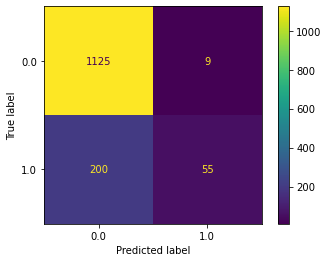

In [17]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf, X_valid_, y_valid_) 

In [18]:
from sklearn.metrics import roc_auc_score
score = roc_auc_score(y_valid_, yhat)
print(f"ROC AUC: {score:.4f}")

ROC AUC: 0.6039


              precision    recall  f1-score   support

      absent       0.85      0.99      0.92      1134
     present       0.86      0.22      0.34       255

    accuracy                           0.85      1389
   macro avg       0.85      0.60      0.63      1389
weighted avg       0.85      0.85      0.81      1389



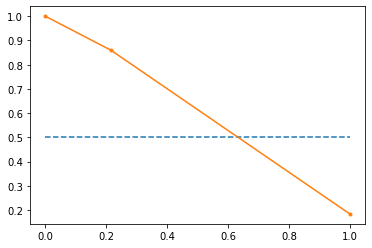

AUC: 0.610


In [19]:
names =["absent", "present"]
print(classification_report(y_valid_, yhat, target_names = names))

precision, recall, thresholds = precision_recall_curve(y_valid_, yhat)
auc_score = auc(recall, precision)
plt.plot([0, 1], [0.5, 0.5], linestyle='--')
plt.plot(recall, precision, marker='.')
plt.show()
print('AUC: %.3f' % auc_score)